# <center><span style="font-family:cursive;">Decision Tree from scratch</span></center>

![](https://miro.medium.com/max/1400/1*Qy8wtdBnnlP3gz9gG6olvQ.jpeg)

# <span style="font-family:cursive;">What is Decision tree ?</span>

Decision trees can be used for classification as well as regression problems ( C A R T ). The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Programatically, Decision trees are nothing but a gaint structure of nested if - else condition.

Mathematically, Decisio trees use hyperplanes which run parallel to any one of the axes to cut your co-ordinate system into hyper cuboids.

![](https://developers.bloomreach.com/binaries/original/content/gallery/developer/blog/decision-tree.jpg)

<p>Before learning more about decision trees let’s get familiar with some of the terminologies.<br>
    
<b>Root Nodes</b> – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.<br>

<b>Decision Nodes</b> – the nodes we get after splitting the root nodes are called Decision Node<br>

<b>Leaf Nodes</b> – the nodes where further splitting is not possible are called leaf nodes or terminal nodes<br>

<b>Sub-tree</b> – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.<br>

<b>Pruning</b> – is nothing but cutting down some nodes to stop overfitting.</p><br>

Types of decision tree : **Classification Tree** and **Regression Tree**.<br>

There are 4 different types of splitting criteria : 
* Categorical Target Variable (classification) : **Information Gain** , **Gini Impurity** and **Chi-Square** 
* Continuous Target Variable (regression) : **Reduction in Variance**.

# <span style="font-family:cursive;">Information Gain</span>
Information gain is used to decide which feature to split on at each step in building the tree. It works on the concept of the entropy. Entropy is used for calculating the purity of a node. Lower the value of entropy, higher is the purity of the node. 

#### Entropy = $- \sum\limits_{i=1}^{n} p_i \space log_2 \space p_i $
where,
> n = number of class in the target variable

#### Information Gain = $ entropy(parent) - \sum\limits_{i=1}^{n} weighted \space average_i*entropy(child)_i$
where,
> n = number of class in the selected feature

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import math

# Reading the dataset (Tennis-dataset)
data = pd.read_csv('C://Users//DEEPIKA//Documents//Machine Learning//ID3 Algorithm//PlayTennis.csv')

In [2]:
def highlight(cell_value):
    '''
    Highlight yes / no values in the dataframe
    '''
    color_1 = 'background-color: pink;'
    color_2 = 'background-color: lightgreen;'
    
    if cell_value == 'no':
        return color_1
    elif cell_value == 'yes':
        return color_2  

data.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
def find_entropy(data):
    """
    Returns the entropy of the class or features
    formula: - ∑ P(X)logP(X)
    """
    entropy = 0
    for i in range(data.nunique()):
        x = data.value_counts()[i]/data.shape[0] 
        entropy += (- x * math.log(x,2))
    return round(entropy,3)



def information_gain(data, data_):
    """
    Returns the information gain of the features
    """
    info = 0
    for i in range(data_.nunique()):
        df = data[data_ == data_.unique()[i]]
        w_avg = df.shape[0]/data.shape[0]
        entropy = find_entropy(df.play)
        x = w_avg * entropy
        info += x
    ig = find_entropy(data.play) - info
    return round(ig, 3)   



def entropy_and_infogain(datax, feature):
    """
    Grouping features with the same class and computing their 
    entropy and information gain for splitting
    """
    for i in range(data[feature].nunique()):
        df = datax[datax[feature]==data[feature].unique()[i]]
        if df.shape[0] < 1:
            continue
        
        display(df[[feature, 'play']].style.applymap(highlight)\
                .set_properties(subset=[feature, 'play'], **{'width': '80px'})\
                .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), 
                                                                ('border', '1px solid gray'), 
                                                                ('font-weight', 'bold')]},
                                   {'selector': 'td', 'props': [('border', '1px solid gray')]},
                                   {'selector': 'tr:hover', 'props': [('background-color', 'white'), 
                                                                      ('border', '1.5px solid black')]}]))
        
        print(f'Entropy of {feature} - {data[feature].unique()[i]} = {find_entropy(df.play)}')
    print(f'Information Gain for {feature} = {information_gain(datax, datax[feature])}')

**Computing entropy for the entire dataset**

In [4]:
print(f'Entropy of the entire dataset: {find_entropy(data.play)}')

Entropy of the entire dataset: 0.94


# Step 1
<h3 style='font-family: serif;'>Calculate the Information Gain for each feature.</h3>

**Outlook**

In [5]:
entropy_and_infogain(data, 'outlook')

,outlook,play
0,sunny,no
1,sunny,no
7,sunny,no
8,sunny,yes
10,sunny,yes


Entropy of outlook - sunny = 0.971


,outlook,play
2,overcast,yes
6,overcast,yes
11,overcast,yes
12,overcast,yes


Entropy of outlook - overcast = 0.0


,outlook,play
3,rainy,yes
4,rainy,yes
5,rainy,no
9,rainy,yes
13,rainy,no


Entropy of outlook - rainy = 0.971
Information Gain for outlook = 0.246


**Temp**

In [6]:
entropy_and_infogain(data, 'temp')

,temp,play
0,hot,no
1,hot,no
2,hot,yes
12,hot,yes


Entropy of temp - hot = 1.0


,temp,play
3,mild,yes
7,mild,no
9,mild,yes
10,mild,yes
11,mild,yes
13,mild,no


Entropy of temp - mild = 0.918


,temp,play
4,cool,yes
5,cool,no
6,cool,yes
8,cool,yes


Entropy of temp - cool = 0.811
Information Gain for temp = 0.029


**Humidity**

In [7]:
entropy_and_infogain(data, 'humidity')

,humidity,play
0,high,no
1,high,no
2,high,yes
3,high,yes
7,high,no
11,high,yes
13,high,no


Entropy of humidity - high = 0.985


,humidity,play
4,normal,yes
5,normal,no
6,normal,yes
8,normal,yes
9,normal,yes
10,normal,yes
12,normal,yes


Entropy of humidity - normal = 0.592
Information Gain for humidity = 0.151


**Windy**

In [8]:
entropy_and_infogain(data, 'windy')

,windy,play
0,False,no
2,False,yes
3,False,yes
4,False,yes
7,False,no
8,False,yes
9,False,yes
12,False,yes


Entropy of windy - False = 0.811


,windy,play
1,True,no
5,True,no
6,True,yes
10,True,yes
11,True,yes
13,True,no


Entropy of windy - True = 1.0
Information Gain for windy = 0.048


# Step 2
<h3 style='font-family: serif;'>Make a decision tree node using the feature with the maximum Information Gain.</h3>

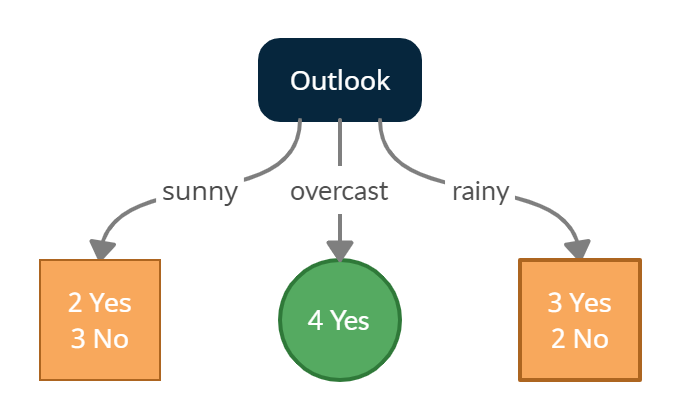

<div class="alert alert-block alert-info" style="text-align:center">
<b>Outlook has the highest Information Gain - 0.246, so it is used as the root node.</b><br>
<b>In Overcast every data belongs to same class (Yes), which makes it as leaf node.</b><br>  
<b>Sunny and Rainy has different class (Yes & no). So we find the feature with maximum Information gain for sunny and rainy for further splitting.</b>
</div>

# Step 3
<h3 style='font-family: serif;'>Repeat until we run out of all features, or the decision tree has all leaf nodes.</h3>

### **Outlook - Sunny**

In [9]:
sunny = data[data['outlook'] == 'sunny']
sunny.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [10]:
print(f'Entropy of the Sunny dataset: {find_entropy(sunny.play)}')

Entropy of the Sunny dataset: 0.971


**Calculating the Information gain for each feature**

**Temp**

In [11]:
entropy_and_infogain(sunny, 'temp')

,temp,play
0,hot,no
1,hot,no


Entropy of temp - hot = 0.0


,temp,play
7,mild,no
10,mild,yes


Entropy of temp - mild = 1.0


,temp,play
8,cool,yes


Entropy of temp - cool = 0.0
Information Gain for temp = 0.571


**Humidity**

In [12]:
entropy_and_infogain(sunny, 'humidity')

,humidity,play
0,high,no
1,high,no
7,high,no


Entropy of humidity - high = 0.0


,humidity,play
8,normal,yes
10,normal,yes


Entropy of humidity - normal = 0.0
Information Gain for humidity = 0.971


**Windy**

In [13]:
entropy_and_infogain(sunny, 'windy')

,windy,play
0,False,no
7,False,no
8,False,yes


Entropy of windy - False = 0.918


,windy,play
1,True,no
10,True,yes


Entropy of windy - True = 1.0
Information Gain for windy = 0.02


**Making a decision tree node using the feature which has the maximum Information Gain.**

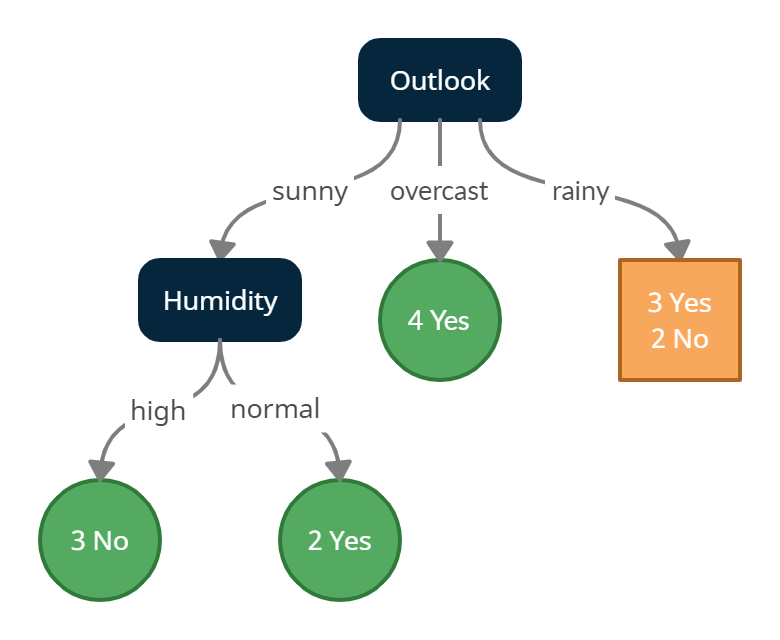

<div class="alert alert-block alert-info" style="text-align:center">
<b>Humidity has the highest Information Gain - 0.971, so it is used as the decision node.</b><br>
<b>In Overcast and Humidity - high, normal every data classified to same class, which makes them as leaf node.</b><br>  
<b>Now, only Rainy has different class (Yes & no). So again we find the feature with maximum Information gain for
and rainy for further splitting.</b> 
</div>

### **Outlook - Rainy**

In [14]:
rainy = data[data['outlook'] == 'rainy'] 
rainy.style.applymap(highlight)\
    .set_properties(subset=data.columns, **{'width': '100px'})\
    .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightgray'), ('border', '1px solid gray'),
                                                    ('font-weight', 'bold')]},
     {'selector': 'tr:hover', 'props': [('background-color', 'white'), ('border', '1.5px solid black')]}])

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [15]:
print(f'Entropy of the Rainy dataset: {find_entropy(rainy.play)}')

Entropy of the Rainy dataset: 0.971


**Calculating the Information gain for each feature**

**Temp**

In [16]:
entropy_and_infogain(rainy, 'temp')

,temp,play
3,mild,yes
9,mild,yes
13,mild,no


Entropy of temp - mild = 0.918


,temp,play
4,cool,yes
5,cool,no


Entropy of temp - cool = 1.0
Information Gain for temp = 0.02


**Humidity**

In [17]:
entropy_and_infogain(rainy, 'humidity')

,humidity,play
3,high,yes
13,high,no


Entropy of humidity - high = 1.0


,humidity,play
4,normal,yes
5,normal,no
9,normal,yes


Entropy of humidity - normal = 0.918
Information Gain for humidity = 0.02


**Windy**

In [18]:
entropy_and_infogain(rainy, 'windy')

,windy,play
3,False,yes
4,False,yes
9,False,yes


Entropy of windy - False = 0.0


,windy,play
5,True,no
13,True,no


Entropy of windy - True = 0.0
Information Gain for windy = 0.971


**Making a decision tree node using the feature which has the maximum Information Gain.**

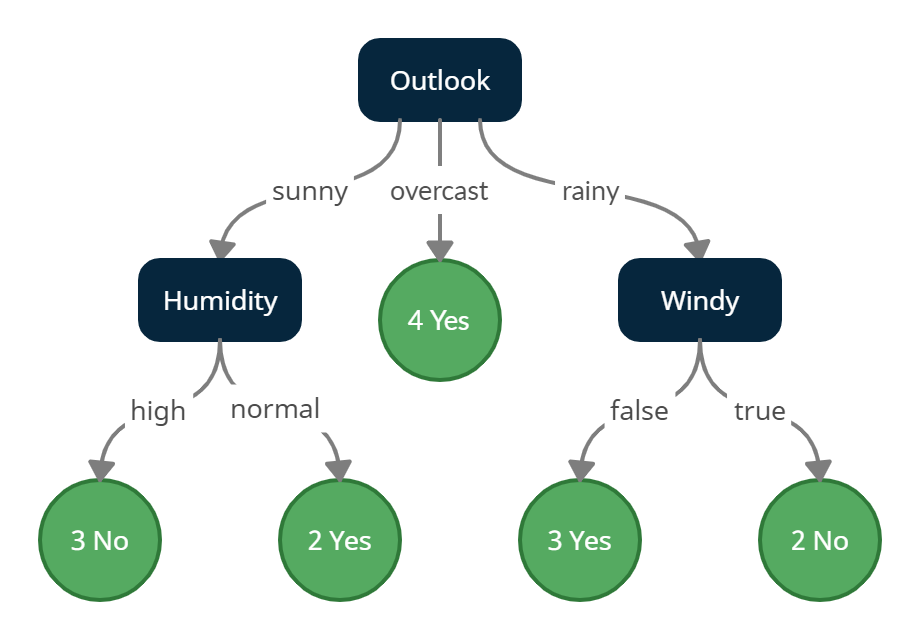

<div class="alert alert-block alert-info" style="text-align:center">    
<b>Windy has the highest Information Gain - 0.971, so it is used as the decision node.</b><br>
<b>This decision tree has all leaf node.</b><br>
</div>